# YÊU CẦU 1: GIẢM CHIỀU DỮ LIỆU VÀ TRỰC QUAN HOÁ DỮ LIỆU


## XÂY DỰNG HÀM

In [1]:
import gzip
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'fashion-mnist')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path,
                   labels_path,
                   shuffle=False,
                   image_size=28):
    """
    This function reads all the data from the MNIST dataset.

    Parameters:
    - images_path: Đường dẫn tới tập tin chứa hình ảnh dữ liệu.
    - labels_path: Đường dẫn tới tập tin chứa nhãn tương ứng với các hình ảnh.
    - shuffle: True nếu bạn muốn xáo trộn dữ liệu, False nếu không.
    - image_size: Kích thước của mỗi hình ảnh, mặc định là 28x28.

    Returns:
    - images: Mảng chứa hình ảnh dưới dạng vector.
    - labels: Mảng chứa nhãn tương ứng với mỗi hình ảnh.
    """
    # Đọc dữ liệu hình ảnh
    with gzip.open(images_path, 'r') as f_images:
        f_images.read(16)  # Bỏ qua 16 byte header
        buf_images = f_images.read()
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        images = images.reshape(-1, image_size * image_size)

    # Đọc dữ liệu nhãn
    with gzip.open(labels_path, 'r') as f_labels:
        f_labels.read(8)  # Bỏ qua 8 byte header
        buf_labels = f_labels.read()
        labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # Xáo trộn dữ liệu nếu được yêu cầu
    if shuffle:
        # Tạo thứ tự ngẫu nhiên
        rand_order = np.random.permutation(len(images))
        # Áp dụng thứ tự ngẫu nhiên đó vào dữ liệu hình ảnh và nhãn
        images = images[rand_order]
        labels = labels[rand_order]

    return images, labels


In [5]:
train_images, train_labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path,
                                          test_labels_path,
                                          shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [6]:
train_labels

array([5, 0, 0, ..., 8, 1, 1])

In [7]:
train_images[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

ground truth:  5


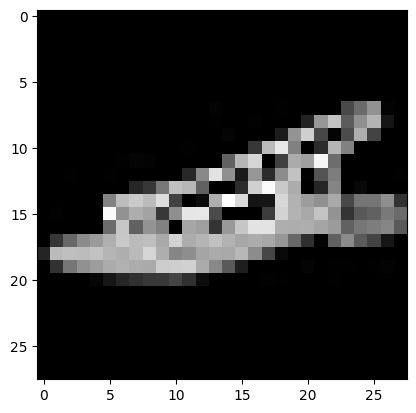

In [119]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0].reshape((28,28)), cmap='gray')
print('ground truth: ', train_labels[0])
plt.show()

In [9]:
# Bước 1: Chuẩn hoá dữ liệu, điều chỉnh theo vector kỳ vọng
adjusted_train = train_images - train_images.mean(axis=0)
print(adjusted_train)

[[-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -2.7063334e+00
  -8.1900001e-01 -7.0883334e-02]
 [-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -1.7063334e+00
  -8.1900001e-01 -7.0883334e-02]
 [-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -2.7063334e+00
  -8.1900001e-01 -7.0883334e-02]
 ...
 [-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -2.7063334e+00
  -8.1900001e-01 -7.0883334e-02]
 [-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -2.7063334e+00
  -8.1900001e-01 -7.0883334e-02]
 [-7.9999998e-04 -5.7833334e-03 -3.0083334e-02 ... -2.7063334e+00
  -8.1900001e-01 -7.0883334e-02]]


In [10]:
# Bước 2: Tìm ma trận hiệp phương sai
cov_matrix = adjusted_train.T.dot(adjusted_train)/train_images.shape[1]
print(cov_matrix)

[[6.5555960e-01 5.7105631e-01 5.6960762e-01 ... 3.9426342e-01
  4.2435187e-01 4.7909507e-01]
 [5.7105631e-01 4.7461991e+00 8.2355299e+00 ... 1.1911820e+01
  5.1400886e+00 8.1557465e-01]
 [5.6960762e-01 8.2355299e+00 4.5123680e+01 ... 5.3120346e+01
  1.5022108e+01 2.9693489e+00]
 ...
 [3.9426342e-01 1.1911820e+01 5.3120346e+01 ... 2.2794801e+04
  7.8161851e+03 6.6164459e+02]
 [4.2435187e-01 5.1400886e+00 1.5022108e+01 ... 7.8161851e+03
  6.3838418e+03 7.2750757e+02]
 [4.7909507e-01 8.1557465e-01 2.9693489e+00 ... 6.6164459e+02
  7.2750757e+02 3.2976486e+02]]


In [11]:
# Bước 3: Tìm giá trị riêng và vector riêng tương ứng
from numpy import linalg as LA
eigen_value, eigen_vector = LA.eig(cov_matrix)
print("Eigen Value")
print(eigen_value)
print("Eigen Vector")
print(eigen_vector)

Eigen Value
[9.85799280e+07 6.02742240e+07 2.04335120e+07 1.68290520e+07
 1.30616700e+07 1.17483130e+07 7.94936800e+06 6.46839350e+06
 4.58236700e+06 4.46155600e+06 3.37050700e+06 3.10017350e+06
 2.59967875e+06 2.23948275e+06 2.06349725e+06 2.00230438e+06
 1.87363362e+06 1.78051412e+06 1.55503188e+06 1.54635800e+06
 1.47221012e+06 1.38198038e+06 1.30617975e+06 1.26470988e+06
 1.22583112e+06 1.19039500e+06 1.13127038e+06 1.08414225e+06
 1.04580981e+06 9.95608938e+05 9.35612500e+05 8.99832375e+05
 8.95262125e+05 8.68529625e+05 8.35799812e+05 8.00857500e+05
 7.81789812e+05 7.65583188e+05 7.41691500e+05 7.10589125e+05
 6.79962938e+05 6.60913438e+05 6.64505438e+05 6.20492500e+05
 5.95305938e+05 5.83653188e+05 5.73015000e+05 5.56622312e+05
 5.46244375e+05 5.25663125e+05 5.16960844e+05 5.09374219e+05
 4.98329656e+05 4.86515750e+05 4.69382656e+05 4.65061688e+05
 4.45293938e+05 4.37409719e+05 4.32000844e+05 4.27247531e+05
 4.12288469e+05 4.08038156e+05 4.01083938e+05 3.94670281e+05
 3.92375625e

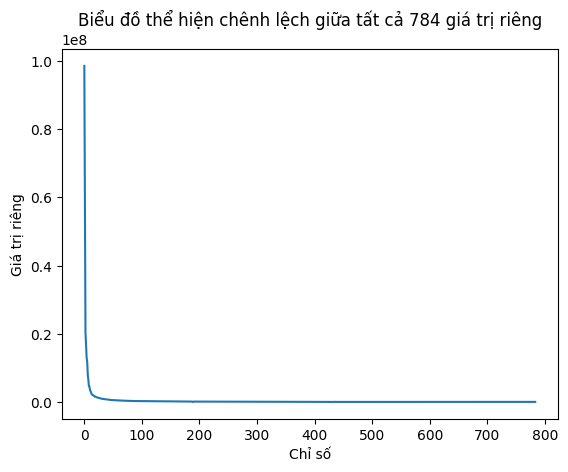

In [12]:
plt.plot(eigen_value)
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị riêng')
plt.title('Biểu đồ thể hiện chênh lệch giữa tất cả 784 giá trị riêng')
plt.show()

In [13]:
# Bước 4: Sắp xếp mức độ quan trọng của các thành phần
order_of_importance = np.argsort(eigen_value)[::-1]

sorted_eigenvalues = eigen_value[order_of_importance]
sorted_eigenvectors = eigen_vector[:,order_of_importance]

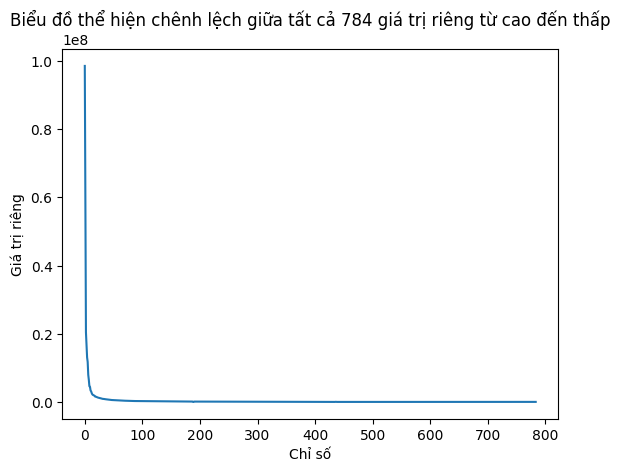

In [14]:
plt.plot(eigen_value)
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị riêng')
plt.title('Biểu đồ thể hiện chênh lệch giữa tất cả 784 giá trị riêng từ cao đến thấp')
plt.show()

Nhận xét 1:
- Có nhiều giá trị riêng mang giá trị 0, những giá trị này không có ý nghĩa nên ta sẽ loại bỏ đi, chỉ giữ lại các giá trị riêng khác 0.

- Ta sẽ thực hiện lấy ra các giá trị riêng khác 0.

In [15]:
# Index của các giá trị riêng bằng 0
zero_eigenvalues_id = [index for index, value in enumerate(sorted_eigenvalues) if value == 0]

print("Số lượng giá trị riêng bằng 0 là: ", len(zero_eigenvalues_id))
print("Index của các giá trị riêng bằng 0: ", zero_eigenvalues_id)

# Giữ lại các giá trị riêng khác 0
non_zero_eigenvalues = eigen_value[:717]

# In số lượng giá trị riêng có ý nghĩa trong tập dữ liệu
print('Số lượng giá trị riêng có ý nghĩa trong tập dữ liệu là: ',len(non_zero_eigenvalues))

# In danh sách các giá trị riêng có ý nghĩa
print('Danh sách các giá trị riêng có ý nghĩa:', non_zero_eigenvalues)


Số lượng giá trị riêng bằng 0 là:  0
Index của các giá trị riêng bằng 0:  []
Số lượng giá trị riêng có ý nghĩa trong tập dữ liệu là:  717
Danh sách các giá trị riêng có ý nghĩa: [9.85799280e+07 6.02742240e+07 2.04335120e+07 1.68290520e+07
 1.30616700e+07 1.17483130e+07 7.94936800e+06 6.46839350e+06
 4.58236700e+06 4.46155600e+06 3.37050700e+06 3.10017350e+06
 2.59967875e+06 2.23948275e+06 2.06349725e+06 2.00230438e+06
 1.87363362e+06 1.78051412e+06 1.55503188e+06 1.54635800e+06
 1.47221012e+06 1.38198038e+06 1.30617975e+06 1.26470988e+06
 1.22583112e+06 1.19039500e+06 1.13127038e+06 1.08414225e+06
 1.04580981e+06 9.95608938e+05 9.35612500e+05 8.99832375e+05
 8.95262125e+05 8.68529625e+05 8.35799812e+05 8.00857500e+05
 7.81789812e+05 7.65583188e+05 7.41691500e+05 7.10589125e+05
 6.79962938e+05 6.60913438e+05 6.64505438e+05 6.20492500e+05
 5.95305938e+05 5.83653188e+05 5.73015000e+05 5.56622312e+05
 5.46244375e+05 5.25663125e+05 5.16960844e+05 5.09374219e+05
 4.98329656e+05 4.86515750e+0

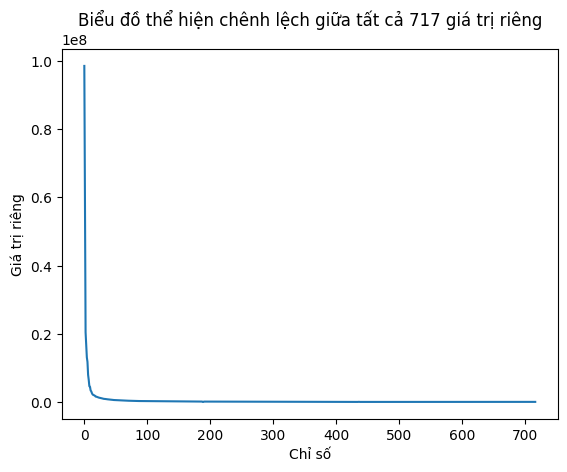

In [16]:
plt.plot(non_zero_eigenvalues)
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị riêng')
plt.title('Biểu đồ thể hiện chênh lệch giữa tất cả 717 giá trị riêng')
plt.show()

Nhận xét 2: Tuy vậy, có 1 vị trí mà ở đó giá trị riêng có sự biến động lớn. Để tiết kiệm chi phí tính toán và thời gian chạy cho mô hình, nên khi lấy số k thành phần chính ta có thể không cần lấy các giá trị mà vẫn đảm bảo hiệu suất.

Bước tiếp theo đây ta sẽ đi tìm k bao nhiêu để đảm báo hiệu suất tối ưu bằng explained_variance

In [17]:
# Tạo danh sách mới chứa các giá trị chênh lệch
differences = [non_zero_eigenvalues[0] - value for value in non_zero_eigenvalues[1:]]

print("Danh sách các giá trị chênh lệch giữa giá trị đầu tiên và các giá trị còn lại:")
print(differences)

Danh sách các giá trị chênh lệch giữa giá trị đầu tiên và các giá trị còn lại:
[np.float32(38305704.0), np.float32(78146420.0), np.float32(81750880.0), np.float32(85518260.0), np.float32(86831620.0), np.float32(90630560.0), np.float32(92111540.0), np.float32(93997560.0), np.float32(94118370.0), np.float32(95209420.0), np.float32(95479750.0), np.float32(95980250.0), np.float32(96340450.0), np.float32(96516430.0), np.float32(96577624.0), np.float32(96706296.0), np.float32(96799416.0), np.float32(97024900.0), np.float32(97033570.0), np.float32(97107720.0), np.float32(97197944.0), np.float32(97273750.0), np.float32(97315220.0), np.float32(97354100.0), np.float32(97389540.0), np.float32(97448660.0), np.float32(97495784.0), np.float32(97534120.0), np.float32(97584320.0), np.float32(97644310.0), np.float32(97680100.0), np.float32(97684664.0), np.float32(97711400.0), np.float32(97744130.0), np.float32(97779070.0), np.float32(97798136.0), np.float32(97814344.0), np.float32(97838240.0), np.float

Các giá trị riêng từ index thứ 87 trở đi khá thấp và không có sự chênh lệch lớn so với các giá trị riêng quan trọng lớn hơn
Nghĩa là các giá trị riêng lớn hơn 261176.75 sẽ có đóng góp đáng kể hơn cho việc huấn luyện mô hình


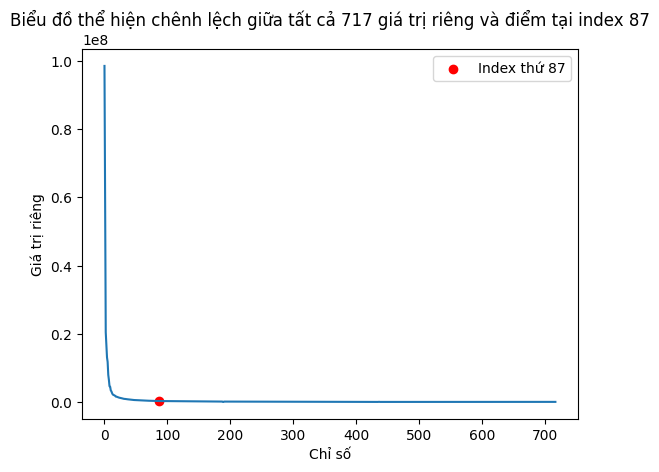

In [18]:
import matplotlib.pyplot as plt

a = 86 + 1
print('Các giá trị riêng từ index thứ', a, 'trở đi khá thấp và không có sự chênh lệch lớn so với các giá trị riêng quan trọng lớn hơn')
print('Nghĩa là các giá trị riêng lớn hơn', non_zero_eigenvalues[a], 'sẽ có đóng góp đáng kể hơn cho việc huấn luyện mô hình')
plt.plot(non_zero_eigenvalues)
plt.xlabel('Chỉ số')
plt.ylabel('Giá trị riêng')
plt.title('Biểu đồ thể hiện chênh lệch giữa tất cả 717 giá trị riêng và điểm tại index 87')

# Thêm điểm a vào biểu đồ
plt.scatter(a, non_zero_eigenvalues[a], color='red', label='Index thứ 87')
plt.legend()  # Thêm chú thích cho điểm a

plt.show()


In [19]:
# explained variance một giá trị số đo độ lớn của phương sai của dữ liệu ban đầu được giải thích bởi mỗi thành phần chính.
# đây là phần trăm lượng thông tin từ dữ liệu gốc mà mỗi thành phần chính giữ lại.
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
explained_variance

array([2.90392280e-01, 1.77553073e-01, 6.01921119e-02, 4.95742597e-02,
       3.84764746e-02, 3.46076488e-02, 2.34168880e-02, 1.90543011e-02,
       1.34985289e-02, 1.31426491e-02, 9.92868654e-03, 9.13235079e-03,
       7.65801594e-03, 6.59696665e-03, 6.07855665e-03, 5.89829730e-03,
       5.51926484e-03, 5.24495775e-03, 4.58074221e-03, 4.55519138e-03,
       4.33676969e-03, 4.07097535e-03, 3.84768518e-03, 3.72552499e-03,
       3.61099769e-03, 3.50661157e-03, 3.33244493e-03, 3.19361710e-03,
       3.08069913e-03, 2.93281977e-03, 2.75608478e-03, 2.65068538e-03,
       2.63722264e-03, 2.55847513e-03, 2.46206112e-03, 2.35912972e-03,
       2.30296096e-03, 2.25522020e-03, 2.18484108e-03, 2.09322129e-03,
       2.00300408e-03, 1.95747009e-03, 1.94688886e-03, 1.82781869e-03,
       1.75362523e-03, 1.71929912e-03, 1.68796163e-03, 1.63967279e-03,
       1.60910189e-03, 1.54847465e-03, 1.52283977e-03, 1.50049152e-03,
       1.46795693e-03, 1.43315608e-03, 1.38268620e-03, 1.36995758e-03,
      

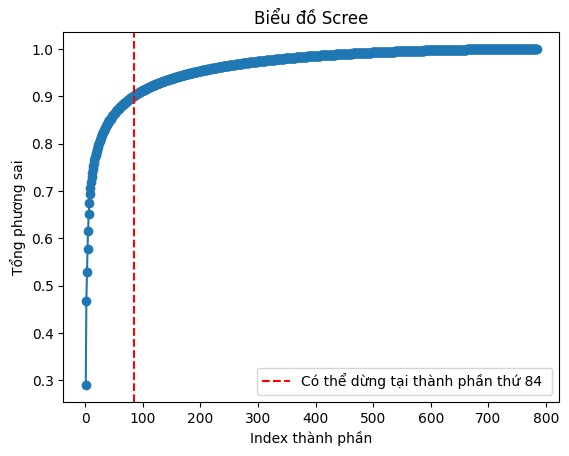

Số thành phần để tối ưu là: 84


In [20]:
total_variance = np.sum(eigen_value)

sorted_eigen_value = np.sort(eigen_value)[::-1]

cumulative_variance = np.cumsum(sorted_eigen_value) / total_variance
k = np.argmax(cumulative_variance >= 0.9) + 1

# Vẽ biểu đồ Scree plot
plt.plot(range(1, len(eigen_value) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Index thành phần')
plt.ylabel('Tổng phương sai')
plt.title('Biểu đồ Scree')
plt.axvline(x=k, color='r', linestyle='--', label=f'Có thể dừng tại thành phần thứ {k} ')
plt.legend()
plt.show()

print(f"Số thành phần để tối ưu là: {k}")

Nhận xét 3: Do đó ta sẽ giảm chiều dữ liệu từ 784 xuống còn 87

In [21]:
num_pcs = 87
components = np.dot(adjusted_train, sorted_eigenvectors[:, :num_pcs])
print(components.shape)
print(components)

(60000, 87)
[[-1805.3716     -319.4927     -568.6255    ...    79.997635
     11.142203     27.51776  ]
 [ -634.5566     -477.644      -584.1884    ...   -17.25491
     67.70999     -18.379704 ]
 [-1373.4728     -864.92267    -504.82437   ...    43.162296
    -50.193546     -6.7029476]
 ...
 [ -791.54565    -921.76855     180.62463   ...    49.22408
     34.677658     29.593817 ]
 [ -335.99997   -1444.7926      221.357     ...    63.100876
    -28.080421    -41.25858  ]
 [  678.78143   -1124.8945      273.2885    ...   -10.362546
     30.159685     57.922787 ]]


In [23]:
# Kiểm tra với PCA trong thư viện sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=87)
pca.fit(train_images)
print(pca.transform(train_images).shape)
print(pca.transform(train_images))

(60000, 87)
[[-1805.369      -319.49738     568.64197   ...    79.75097
     11.805221     25.408388 ]
 [ -634.5513     -477.64365     584.1558    ...   -17.852798
     67.8961      -18.526783 ]
 [-1373.4664     -864.9251      504.7874    ...    43.44483
    -50.00784      -7.1520033]
 ...
 [ -791.54224    -921.76965    -180.66675   ...    48.966362
     34.628197     30.234835 ]
 [ -335.99854   -1444.792      -221.3404    ...    63.145435
    -27.403923    -41.41134  ]
 [  678.7805    -1124.8939     -273.26562   ...   -10.662785
     29.518467     58.052696 ]]


## TRỰC QUAN HOÁ DỮ LIỆU

### Trường hợp số chiều giảm còn k = 2

In [24]:
# Thực hiện giảm chiều
num_pcs = 2
components_2d = np.dot(adjusted_train, sorted_eigenvectors[:, :num_pcs])
print(components_2d.shape)
print(components_2d)

(60000, 2)
[[-1805.3716   -319.4927 ]
 [ -634.5566   -477.644  ]
 [-1373.4728   -864.92267]
 ...
 [ -791.54565  -921.76855]
 [ -335.99997 -1444.7926 ]
 [  678.78143 -1124.8945 ]]


In [26]:
import pandas as pd
components_2d = np.vstack((components_2d.T, train_labels)).T

dataframe = pd.DataFrame(data=components_2d, columns=("pc1", "pc2", "label"))
print(dataframe.head())

           pc1          pc2  label
0 -1805.371582  -319.492706    5.0
1  -634.556580  -477.644012    0.0
2 -1373.472778  -864.922668    0.0
3    75.035706 -1065.396851    3.0
4  1069.489502   560.305115    2.0


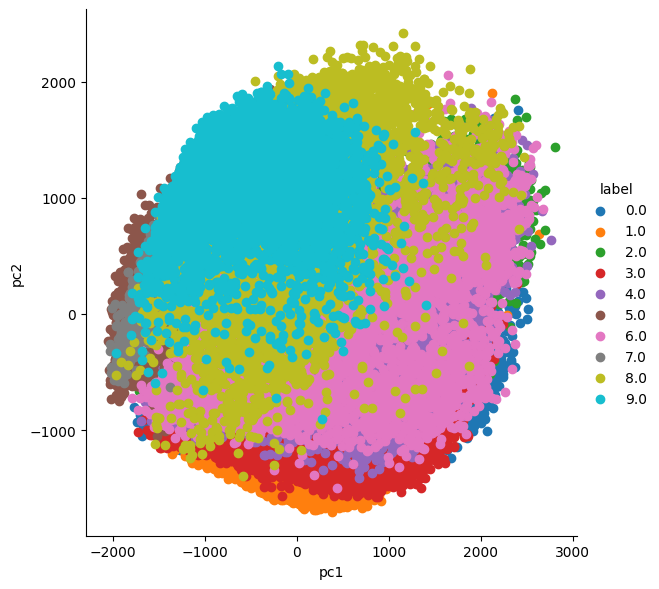

In [27]:
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.show()


### Trường hợp số chiều giảm còn k = 3

In [28]:
# Thực hiện giảm chiều
num_pcs = 3
components_3d = np.dot(adjusted_train, sorted_eigenvectors[:, :num_pcs])
print(components_3d.shape)
print(components_3d)

(60000, 3)
[[-1805.3716   -319.4927   -568.6255 ]
 [ -634.5566   -477.644    -584.1884 ]
 [-1373.4728   -864.92267  -504.82437]
 ...
 [ -791.54565  -921.76855   180.62463]
 [ -335.99997 -1444.7926    221.357  ]
 [  678.78143 -1124.8945    273.2885 ]]


In [29]:
components_3d = np.vstack((components_3d.T, train_labels)).T

dataframe_3d = pd.DataFrame(data=components_3d, columns=("pc1", "pc2", "pc3", "label"))
print(dataframe_3d.head())

           pc1          pc2          pc3  label
0 -1805.371582  -319.492706  -568.625488    5.0
1  -634.556580  -477.644012  -584.188416    0.0
2 -1373.472778  -864.922668  -504.824371    0.0
3    75.035706 -1065.396851   263.573456    3.0
4  1069.489502   560.305115 -1009.730103    2.0


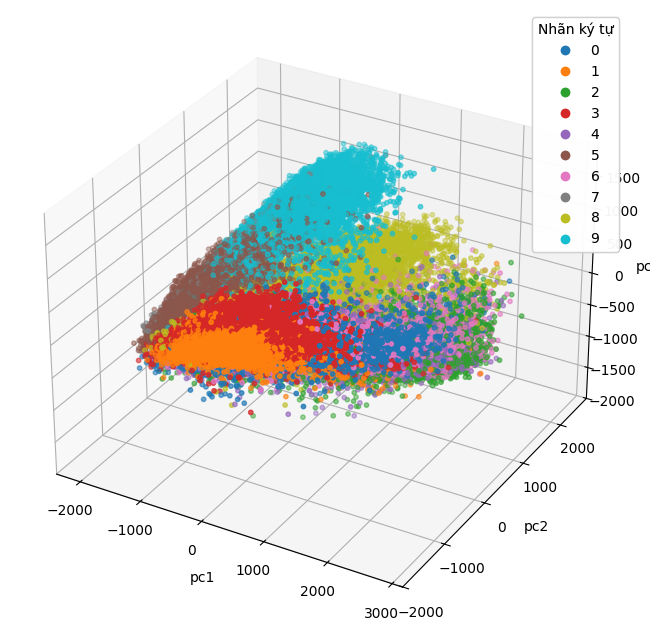

In [30]:
# Trực quan hoá dữ liệu PCA với k=3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components_3d[:, 0], components_3d[:, 1], components_3d[:, 2], c=train_labels, cmap='tab10', s=10)
legend1 = ax.legend(*scatter.legend_elements(), title="Nhãn ký tự")
ax.add_artist(legend1)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

In [31]:
def sum_from_index_2(lst, n):
    if len(lst) < 3:
        return 0

    return sum(lst[n:])

# Ví dụ:
total_sum = sum_from_index_2(sorted_eigenvalues, 2)
print("Tỷ lệ phần thông tin mất đi khi giảm còn 2 chiều:", total_sum/sum(sorted_eigenvalues))
print("Tỷ lệ phần thông tin mất đi khi giảm còn 2 chiều:", sum_from_index_2(sorted_eigenvalues,3)/sum(sorted_eigenvalues))


Tỷ lệ phần thông tin mất đi khi giảm còn 2 chiều: 0.53205436
Tỷ lệ phần thông tin mất đi khi giảm còn 2 chiều: 0.4718623


# YÊU CẦU 2: PHÂN CỤM DỮ LIỆU

## Đọc dữ liệu

In [32]:
import gzip
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'fashion-mnist')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path,
                   labels_path,
                   shuffle=False,
                   image_size=28):
    """
    This function reads all the data from the MNIST dataset.

    Parameters:
    - images_path: Đường dẫn tới tập tin chứa hình ảnh dữ liệu.
    - labels_path: Đường dẫn tới tập tin chứa nhãn tương ứng với các hình ảnh.
    - shuffle: True nếu bạn muốn xáo trộn dữ liệu, False nếu không.
    - image_size: Kích thước của mỗi hình ảnh, mặc định là 28x28.

    Returns:
    - images: Mảng chứa hình ảnh dưới dạng vector.
    - labels: Mảng chứa nhãn tương ứng với mỗi hình ảnh.
    """
    # Đọc dữ liệu hình ảnh
    with gzip.open(images_path, 'r') as f_images:
        f_images.read(16)  # Bỏ qua 16 byte header
        buf_images = f_images.read()
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        images = images.reshape(-1, image_size * image_size)

    # Đọc dữ liệu nhãn
    with gzip.open(labels_path, 'r') as f_labels:
        f_labels.read(8)  # Bỏ qua 8 byte header
        buf_labels = f_labels.read()
        labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # Xáo trộn dữ liệu nếu được yêu cầu
    if shuffle:
        # Tạo thứ tự ngẫu nhiên
        rand_order = np.random.permutation(len(images))
        # Áp dụng thứ tự ngẫu nhiên đó vào dữ liệu hình ảnh và nhãn
        images = images[rand_order]
        labels = labels[rand_order]

    return images, labels


In [33]:
X_train, y_train = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            shuffle=True)
X_test, y_test = get_mnist_data(test_images_path,
                                          test_labels_path,
                                          shuffle=True)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255
print("Kích cỡ tập train:", X_train.shape)
print("Kích cỡ 1 mẫu dữ liệu:", X_train[0].shape)


Kích cỡ tập train: (60000, 784)
Kích cỡ 1 mẫu dữ liệu: (784,)


Mỗi dữ liệu ảnh trong MNIST đã được làm phẳng thành vector kích thước 1 x 784.

Các pixel được chuẩn hoá về kiểu float và thuộc khoảng [0,1]

## K-Means

### 1. Các hàm cần thiết

#### Hàm gán nhãn chính xác cho các cụm được tạo ra bởi mô hình K-means.

In [34]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """

    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

In [35]:
# Define analyze cluster function
import pandas as pd
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = \
        pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']

    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']

    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())

    countMostFreq = \
        pd.DataFrame(data=preds.groupby('cluster').agg(
            lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']

    accuracyDF = countMostFreq.merge(countByCluster,
                                     left_on="cluster",right_on="cluster")
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
                        accuracyDF.clusterCount.sum()

    accuracyByLabel = accuracyDF.countMostFrequent/ \
                        accuracyDF.clusterCount

    return countByCluster, countByLabel, countMostFreq, \
            accuracyDF, overallAccuracy, accuracyByLabel

#### Hàm tính toán mất mát với inertia

In [36]:
from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    print('Số cụm: {}'.format(estimator.n_clusters))
    print('WSCC: {}'.format(estimator.inertia_))

### 2. Áp dụng K-Means với dữ liệu ban đầu

#### 2.1. Khi số cụm là 10

Vì tập dữ liệu MNIST có tất cả 10 label ([0,1,2,3,4,5,6,7,8,9]), nên ý tưởng ban đầu ta sẽ áp dụng k-means với số cụm bằng với số label.

In [37]:
from sklearn.cluster import KMeans

n_digits = len(np.unique(y_test))
print("Số label trong tập dữ liệu là: ", n_digits)

# Khởi tạo mô hình Kmeans
kmeans = KMeans(n_clusters = n_digits)

# Fit mô hình
kmeans.fit(X_train)

Số label trong tập dữ liệu là:  10


KMeans(n_clusters=10)

In [38]:
print("Kết quả phân cụm cho các điểm dữ liệu trong tập train (20 điểm dữ điệu đầu):\n", kmeans.labels_[:20])

Kết quả phân cụm cho các điểm dữ liệu trong tập train (20 điểm dữ điệu đầu):
 [8 8 8 0 8 6 2 6 3 8 1 7 4 9 7 8 8 0 6 8]


In [39]:
# Tính mất mát (inertia)
calculate_metrics(kmeans, X_train, y_train)

Số cụm: 10
WSCC: 1925556.327445322


In [40]:
cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(X_train)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print("Kết quả dự đoán của 20 điểm dữ liệu đầu sau khi dùng k-means:")
print(predicted_labels[:20])
print("Nhãn chính xác của 20 điểm dữ liệu tương ứng")
print(y_train[:20])

Kết quả dự đoán của 20 điểm dữ liệu đầu sau khi dùng k-means:
[5 5 5 7 5 4 1 4 0 5 8 9 8 3 9 5 5 7 4 5]
Nhãn chính xác của 20 điểm dữ liệu tương ứng
[4 6 0 5 3 4 3 4 0 0 1 9 8 4 9 6 5 7 2 2]


#### 2.2. Tìm số cụm K tối ưu nhất

WSCC là độ đo lường tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến tâm gần nhất của nó. Mục tiêu của ta là giảm thiểu WSCC, tức là làm cho các điểm dữ liệu trong mỗi cụm càng gần nhau càng tốt. Do đó, WSCC càng thấp thì các cụm càng chặt chẽ và mô hình phân cụm càng tốt.

Tuy nhiên, ta không thể thực hiện vô hạn K-Means với số cụm rất lớn được, và việc phân cụm càng lớn sẽ dẫn đến trường hợp tại 1 số cụm nào đó mà WSCC không có sự thay đổi lớn nữa.

Ta sẽ vẽ biểu đồ so sánh WSCC giữa các cụm được gọi là elbow plot.

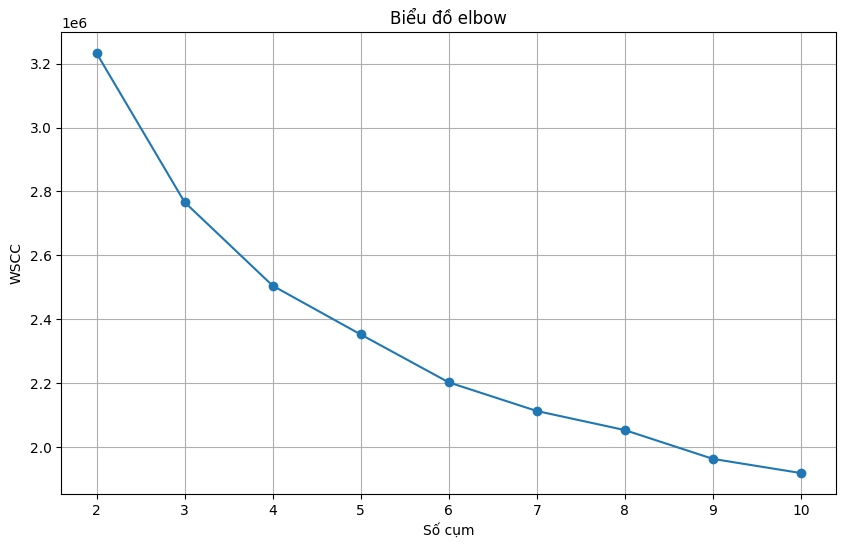

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

clusters = list(range(2, 11))

# Danh sách để lưu trữ giá trị inertia cho mỗi số lượng cụm
inertias = []

# Chạy K-means với các số lượng cụm khác nhau và tính toán inertia
for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Vẽ Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(clusters, inertias, marker='o')
plt.title('Biểu đồ elbow')
plt.xlabel('Số cụm')
plt.ylabel('WSCC')
plt.xticks(clusters)
plt.grid(True)
plt.show()


#### 2.3. Áp dụng với số cụm lớn hơn

Ta đã áp dụng K-Means với K=10 và thu được inertia=1925556.327445322 và cho thử nghiệm với số cụm từ 2 đến 10 nhưng vẫn chưa tìm ra được cụm hợp lý nhất.

Vậy nên ta cần xem xét qua nhiều cụm lớn hơn và đánh giá bằng hàm mất mát (inertia)

In [42]:
clusters = list(range(2, 11))
accuracies = []
# test different numbers of clusters
for n_clusters in clusters:
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(X_train)

    calculate_metrics(estimator, X_train, y_train)

    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))
    accuracies.append(metrics.accuracy_score(y_train, predicted_Y))
    # countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    # accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    # = analyzeCluster(estimator, y_train)

    # print("Độ chính xác: ", overallAccuracy_dbscan)

Số cụm: 2
WSCC: 3233032.114702057
Accuracy: 0.18898333333333334

Số cụm: 3
WSCC: 2766661.051264605
Accuracy: 0.27166666666666667

Số cụm: 4
WSCC: 2505225.950292446
Accuracy: 0.3522666666666667

Số cụm: 5
WSCC: 2352606.637184726
Accuracy: 0.41131666666666666

Số cụm: 6
WSCC: 2202643.825179182
Accuracy: 0.43646666666666667

Số cụm: 7
WSCC: 2113098.2554014744
Accuracy: 0.4790333333333333

Số cụm: 8
WSCC: 2038829.570373258
Accuracy: 0.4988166666666667

Số cụm: 9
WSCC: 1963211.058639288
Accuracy: 0.5540166666666667

Số cụm: 10
WSCC: 1906652.536466085
Accuracy: 0.5536833333333333



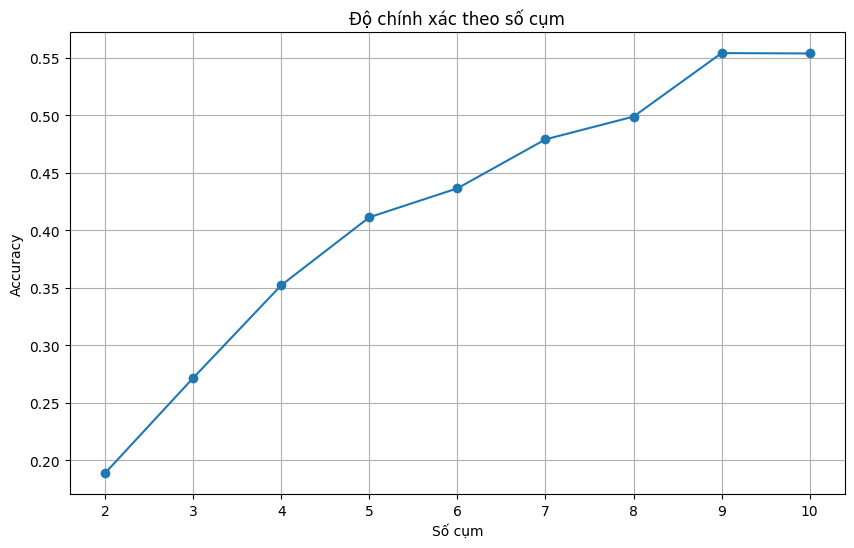

In [43]:
# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(clusters, accuracies, marker='o')
plt.title('Độ chính xác theo số cụm')
plt.xlabel('Số cụm')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Đánh giá với số cụm từ 11 đến 30 cụm

Số cụm: 11
WSCC: 1871373.0372582031
Accuracy: 0.6319

Số cụm: 12
WSCC: 1814881.6415355722
Accuracy: 0.63155

Số cụm: 13
WSCC: 1773924.0755099638
Accuracy: 0.6419833333333334

Số cụm: 14
WSCC: 1737046.7222518304
Accuracy: 0.6539666666666667

Số cụm: 15
WSCC: 1719607.7674640373
Accuracy: 0.624

Số cụm: 16
WSCC: 1695168.5726739871
Accuracy: 0.6291

Số cụm: 17
WSCC: 1662900.6946682225
Accuracy: 0.65375

Số cụm: 18
WSCC: 1644956.8608593184
Accuracy: 0.6454

Số cụm: 19
WSCC: 1620794.0382491786
Accuracy: 0.6465333333333333

Số cụm: 20
WSCC: 1597816.6178900488
Accuracy: 0.6511666666666667

Số cụm: 21
WSCC: 1606440.449890164
Accuracy: 0.6667166666666666

Số cụm: 22
WSCC: 1595576.3721437051
Accuracy: 0.6737

Số cụm: 23
WSCC: 1587852.502518646
Accuracy: 0.6735833333333333

Số cụm: 24
WSCC: 1577620.9416815871
Accuracy: 0.6751833333333334

Số cụm: 25
WSCC: 1569187.506118225
Accuracy: 0.67555

Số cụm: 26
WSCC: 1545605.9598762002
Accuracy: 0.6699833333333334

Số cụm: 27
WSCC: 1538163.5804419937
Accur

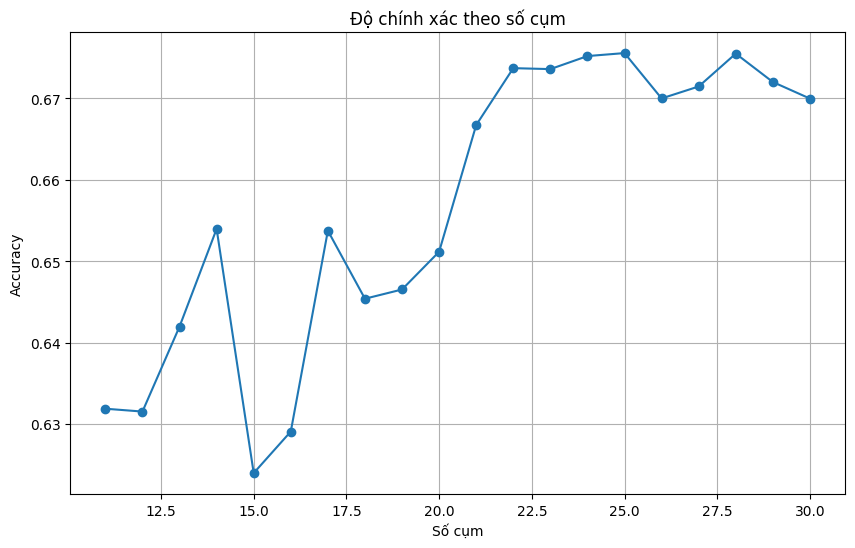

In [44]:
clusters = list(range(11, 31))
accuracies = []
# test different numbers of clusters
for n_clusters in clusters:
    estimator = KMeans(n_clusters = n_clusters, random_state=42)
    estimator.fit(X_train)

    calculate_metrics(estimator, X_train, y_train)

    cluster_labels = infer_cluster_labels(estimator, y_train)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)

    print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train, predicted_Y)))
    accuracies.append(metrics.accuracy_score(y_train, predicted_Y))
# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(clusters, accuracies, marker='o')
plt.title('Độ chính xác theo số cụm')
plt.xlabel('Số cụm')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#### 2.4. Áp dụng K-means với số cụm là 30 trên tập test

In [45]:
kmeans = KMeans(n_clusters = 30)
kmeans.fit(X_train)
cluster_labels = infer_cluster_labels(kmeans, y_train)

test_clusters = kmeans.predict(X_test)
predicted_labels = infer_data_labels(kmeans.predict(X_test), cluster_labels)

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.6694



Với số cụm K=30 thì ta nhận được độ chính xác trên tập test là 67%

### 3. Áp dụng K-Means với dữ liệu được giảm chiều

#### 3.1. Giảm chiều dữ liệu giữ lại 100 thành phần chính

In [46]:
from sklearn.preprocessing import StandardScaler
X_train_pca = StandardScaler().fit_transform(X_train)
X_test_pca = StandardScaler().fit_transform(X_test)
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

pca.fit(X_train_pca)
pca.fit(X_test_pca)

print("Số thành phần trước khi giảm chiều là: ", str(X_train.shape[1]))
print("Số thành phần sau khi giảm chiều là: ", str(pca.n_components_))

# #Transform our data according to our PCA instance
# X_train_pca = pca.transform(X_train_pca)
# X_test_pca = pca.transform(X_test_pca)
# print("Số chiều sau khi giảm chiều là:" , str(X_train_pca.shape))

# approximation = pca.inverse_transform(X_train_pca)
# print("Dimension of our data after inverse transforming the PCA  = " + str(approximation.shape))

Số thành phần trước khi giảm chiều là:  784
Số thành phần sau khi giảm chiều là:  100


#### 3.2. Đánh giá với số cụm từ 2 đến 10

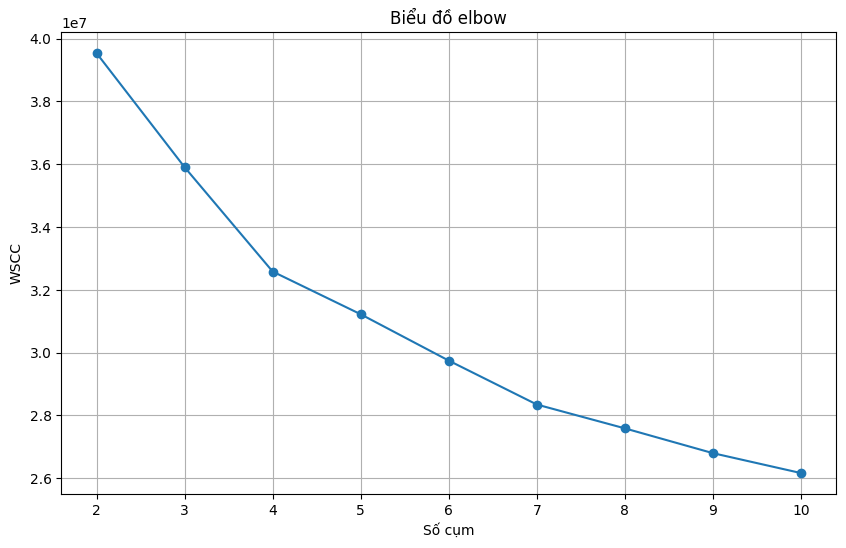

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

clusters = list(range(2, 11))

# Danh sách để lưu trữ giá trị inertia cho mỗi số lượng cụm
inertias = []

# Chạy K-means với các số lượng cụm khác nhau và tính toán inertia
for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)

# Vẽ Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(clusters, inertias, marker='o')
plt.title('Biểu đồ elbow')
plt.xlabel('Số cụm')
plt.ylabel('WSCC')
plt.xticks(clusters)
plt.grid(True)
plt.show()


#### 3.2. Áp dụng dự đoán trên tập test

In [48]:
kmeans = KMeans(n_clusters = 30)
kmeans.fit(X_train_pca)
cluster_labels = infer_cluster_labels(kmeans, y_train)

test_clusters = kmeans.predict(X_test_pca)
predicted_labels = infer_data_labels(kmeans.predict(X_test_pca), cluster_labels)

print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.6586



Độ chính xác với trường hợp giảm chiều dữ liệu là 65.86%

So với khi áp dụng K-Means trên dữ liệu thô thì việc giảm chiều dữ liệu cho ra accuracy thấp hơn.

### Trực quan hoá dữ liệu

Ta thực hiện giảm chiều dữ liệu với PCA và trực quan hoá dữ liệu MNIST khi dùng K-Means với số cụm K=30

1. Dữ liệu 2 chiều

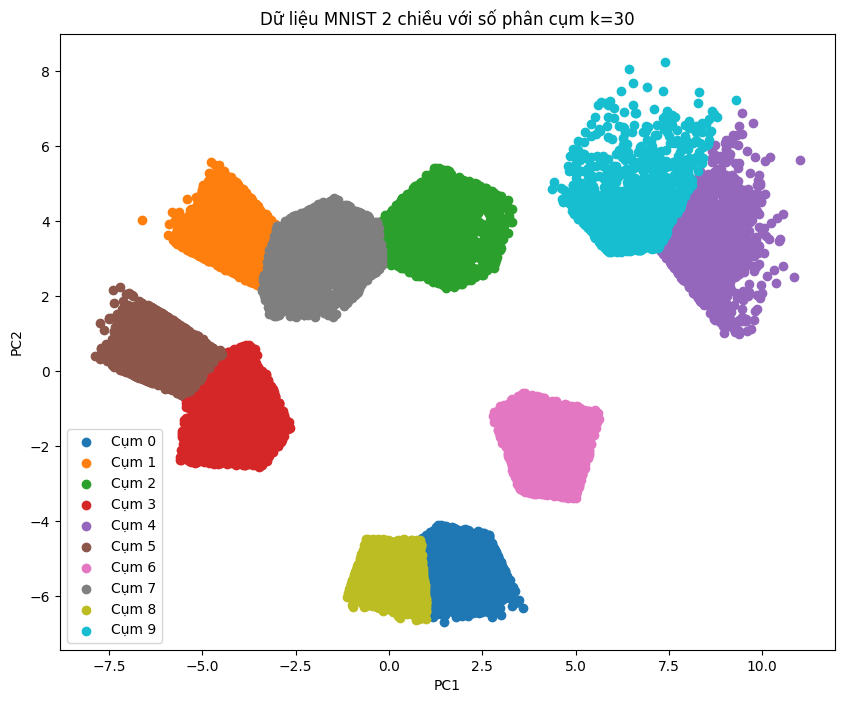

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Cluster the data using KMeans
kmeans = KMeans(n_clusters=30)
clusters = kmeans.fit_predict(X_pca)

# Plotting
plt.figure(figsize=(10, 8))

for cluster in range(10):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], label=f'Cụm {cluster}')

plt.title('Dữ liệu MNIST 2 chiều với số phân cụm k=30')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

2. Dữ liệu 3 chiều

/var/folders/yc/r7st8mts7sd50wcfyng8s1d40000gn/T/ipykernel_46208/3494732564.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


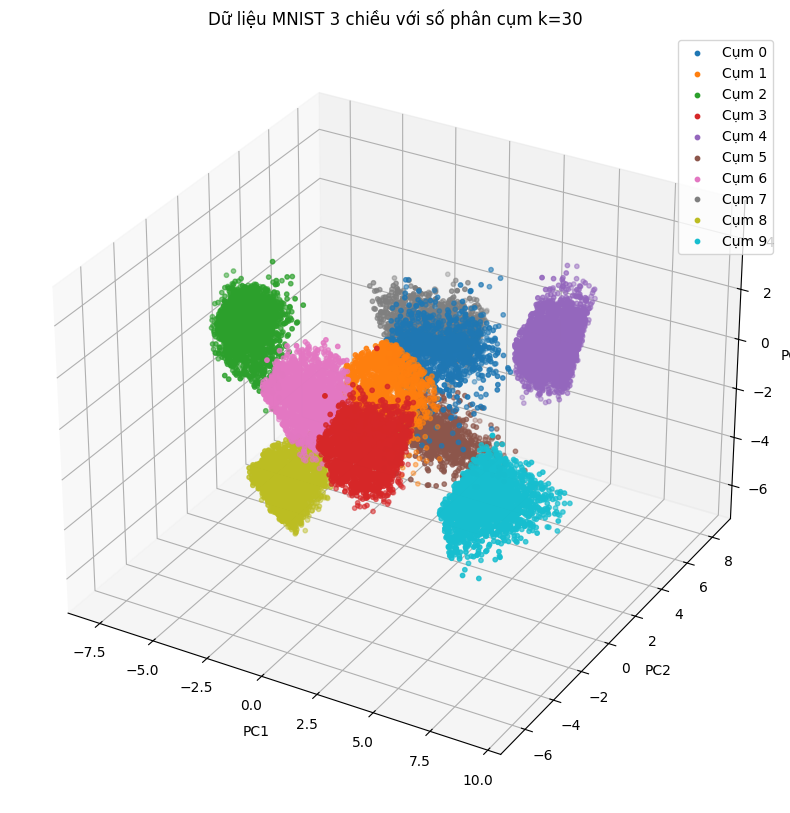

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml

# Khởi tạo PCA với số lượng thành phần chính là 3
pca = PCA(n_components=3)

# Áp dụng PCA để giảm số chiều của dữ liệu
X_pca = pca.fit_transform(X_train)

# Khởi tạo mô hình K-means với số cụm là 10
kmeans = KMeans(n_clusters=30, random_state=42)

# Fit mô hình K-means và dự đoán cụm cho dữ liệu đã giảm chiều
clusters = kmeans.fit_predict(X_pca)

# Vẽ biểu đồ phân tán 3D cho dữ liệu đã giảm xuống 3 chiều
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Sử dụng một mảng màu khác nhau cho các cụm
colors = plt.cm.get_cmap('tab10', 10)

for cluster in range(10):
    ax.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1], X_pca[clusters == cluster, 2],
               color=colors(cluster), label=f'Cụm {cluster}', s=10)

# Đặt tiêu đề và nhãn cho các trục
ax.set_title('Dữ liệu MNIST 3 chiều với số phân cụm k=30')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

## DBSCAN

In [51]:
train_index = range(0,len(X_train))
test_index = range(len(X_train),
                   len(X_train)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)
X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

### Thực hiện với dữ liệu ban đầu

Ta chọn khoảng cách tối đa (gọi là eps) giữa hai điểm là 3 và số mẫu tối thiểu (gọi là min_samples) để một nhóm được gọi là một cụm là 5

In [52]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size,
            n_jobs=n_jobs)

X_train_dbscanClustered = db.fit_predict(X_train)
X_train_dbscanClustered = pd.DataFrame(data=X_train_dbscanClustered,
                                       columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_dbscanClustered, y_train)

overallAccuracy_dbscan

np.float64(0.20161666666666667)

Độ chính xác là 20.16%

### Thực hiện với dữ liệu đã giảm chiều (100 chiều)

In [53]:
from sklearn.cluster import DBSCAN

n_components = 784
whiten = False
random_state = 42

pca = PCA(n_components=n_components, whiten=whiten,
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size,
            n_jobs=n_jobs)

cutoff = 99
X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA.loc[:,0:cutoff])
X_train_PCA_dbscanClustered = \
    pd.DataFrame(data=X_train_PCA_dbscanClustered, index=X_train.index, \
                 columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_PCA_dbscanClustered, y_train)

overallAccuracy_dbscan

np.float64(0.1679)

Độ chính xác khi dữ liệu còn giữ lại 100 chiều là 16.79%

### Trực quan hoá dữ liệu

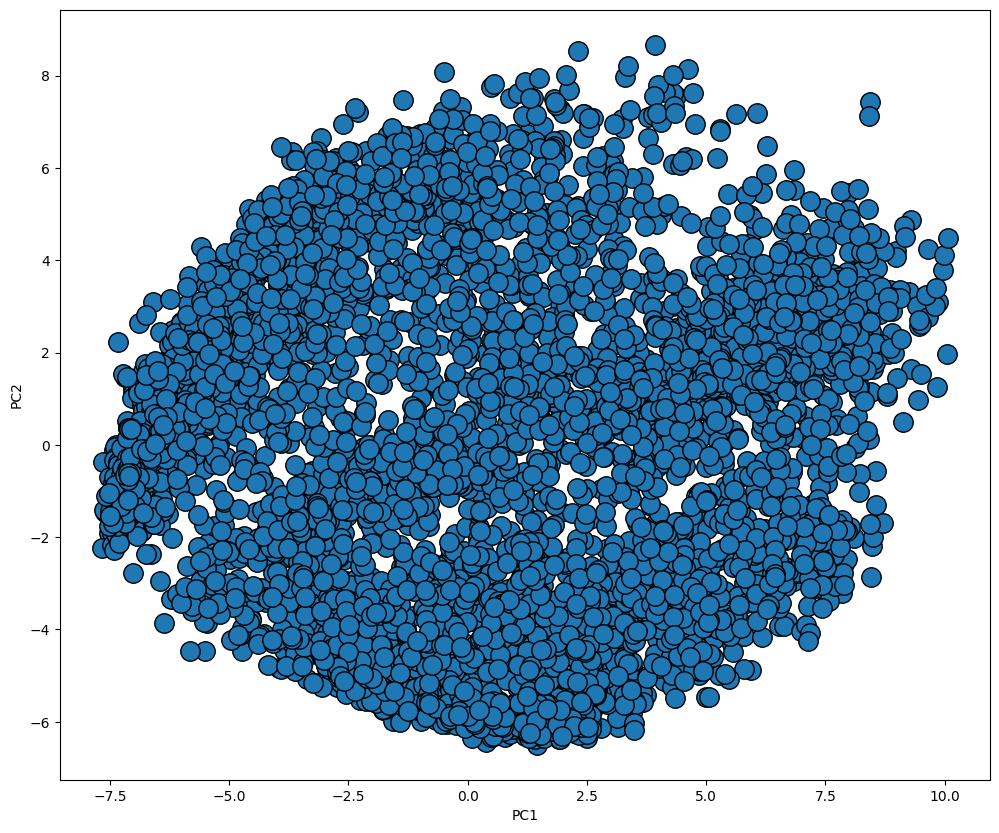

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml
from sklearn import metrics


# Giảm kích thước của tập dữ liệu để nhìn dễ hơn
X, y = X_train[:5000], y_train[:5000]

# Khởi tạo và áp dụng PCA để giảm chiều dữ liệu xuống còn 2 chiều
pca = PCA(n_components=2, whiten=False, random_state=42)
X_pca = pca.fit_transform(X)

# Áp dụng DBSCAN
eps = 3
min_samples = 10
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
labels = db.labels_

# Số lượng cụm và điểm nhiễu
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ = 5
n_noise_ = list(labels).count(-1)

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)

# Trực quan hóa kết quả
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12, 10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Màu đen dành cho điểm nhiễu
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Các điểm lõi
    xy = X_pca[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    # Các điểm biên
    xy = X_pca[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

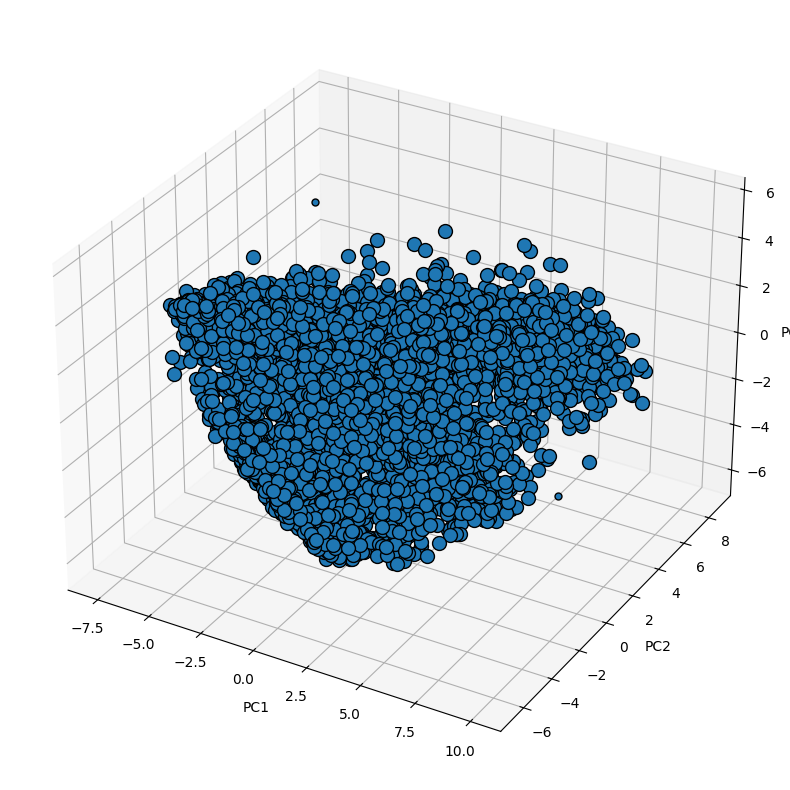

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.datasets import fetch_openml
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D


# Giảm kích thước của tập dữ liệu để tăng tốc độ tính toán (tuỳ chọn)
X, y = X_train[:5000], y_train[:5000]

# Khởi tạo và áp dụng PCA để giảm chiều dữ liệu xuống còn 3 chiều
pca = PCA(n_components=3, whiten=False, random_state=42)
X_pca = pca.fit_transform(X)

# Áp dụng DBSCAN
eps = 3
min_samples = 10
db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
labels = db.labels_

# Số lượng cụm và điểm nhiễu
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_clusters_ = 200
n_noise_ = list(labels).count(-1)
# n_noise_ = 100

# print("Estimated number of clusters: %d" % n_clusters_)
# print("Estimated number of noise points: %d" % n_noise_)

# Trực quan hóa kết quả
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.tab20(each) for each in np.linspace(0, 1, len(unique_labels))]
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Màu đen dành cho điểm nhiễu
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Các điểm lõi
    xyz = X_pca[class_member_mask & core_samples_mask]
    ax.plot(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    # Các điểm biên
    xyz = X_pca[class_member_mask & ~core_samples_mask]
    ax.plot(
        xyz[:, 0],
        xyz[:, 1],
        xyz[:, 2],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=5,
    )

# ax.set_title(f"Số cụm: {n_clusters_}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


# YÊU CẦU 3: MÔ HÌNH CNN

In [56]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # type: ignore

In [60]:
from keras.datasets import fashion_mnist # type: ignore
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [61]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Normalizing an image dataset for CNN means adjusting the pixel values of images so they fall in a similar range, typically between 0 and 1. This helps the CNN learn faster and perform better.

In [62]:
#Scale
X_train = x_train.reshape(-1, 28, 28, 1) / 255.0
X_test = x_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [63]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## Xây dựng mô hình

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [65]:
#Xây dựng mô hình
model = Sequential()

# Tầng tích chập 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

# Tầng tích chập 2
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Tầng tích chập 3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

#Trải phẳng
model.add(Flatten())

# Fully connected
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/namle/Downloads/FinalML/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,210 (403.16 KB)

 Trainable params: 103,210 (403.16 KB)

 Non-trainable params: 0 (0.00 B)

## KFold

In [67]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [68]:
acc_scores = []
for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    print("Cross Validation")
    model.fit(X_train_fold, y_train_fold, epochs=4, batch_size=64, verbose=1)
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_scores.append(accuracy)

Cross Validation
Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.6413 - loss: 0.9807
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8404 - loss: 0.4349
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8634 - loss: 0.3721
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8777 - loss: 0.3351
Cross Validation
Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8801 - loss: 0.3258
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8906 - loss: 0.2975
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8962 - loss: 0.2849
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8984 - loss: 0.2772
Cross Validation
Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9033 - loss: 0.2641
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9067 - loss: 0.2534
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9084 - loss: 0.2473
Epoc

In [70]:
print("Mean validation accuracy:", np.mean(acc_scores))

Mean validation accuracy: 0.9195500016212463


## Huấn luyện mô hình một lần nữa với toàn bộ tập Train

In [71]:
model.fit(X_train,
          y_train,
          batch_size=64,
          epochs=20,
          verbose=1)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9270 - loss: 0.2010
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9250 - loss: 0.2006
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9241 - loss: 0.1990
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9289 - loss: 0.1890
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9273 - loss: 0.1907
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9288 - loss: 0.1876
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9287 - loss: 0.1876
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9328 - loss: 0.1791
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9339 - loss: 0.1774
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9346 - loss: 0.1751
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9350 - loss: 0.1717
Epoch 12/20
938/938 ━━━━━━━━━━━━━

In [72]:
model.save('digit_recognizer.h5')

## Đánh giá mô hình

In [73]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('digit_recognizer.h5')

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [75]:
# Đánh giá mô hình
acc = accuracy_score(y_test_classes, y_pred_classes)
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)
recalls = recall_score(y_test_classes, y_pred_classes, average=None)
precisions = precision_score(y_test_classes, y_pred_classes, average=None)

print("Accuracy:", acc)
print("Recall:", recalls)
print("Precision:", precisions)

Accuracy: 0.9209
Recall: [0.859 0.98  0.879 0.931 0.859 0.983 0.785 0.985 0.986 0.962]
Precision: [0.88374486 0.99796334 0.88519637 0.89519231 0.89107884 0.99092742
 0.74407583 0.95631068 0.99295065 0.98263534]


In [76]:
conf_mat

array([[859,   0,  13,  29,   2,   0,  95,   0,   2,   0],
       [  0, 980,   1,  12,   3,   0,   2,   0,   2,   0],
       [ 14,   1, 879,   8,  28,   0,  70,   0,   0,   0],
       [ 10,   0,   7, 931,  26,   0,  26,   0,   0,   0],
       [  0,   0,  49,  18, 859,   0,  74,   0,   0,   0],
       [  0,   0,   0,   0,   0, 983,   0,  11,   0,   6],
       [ 88,   1,  41,  36,  46,   0, 785,   0,   3,   0],
       [  0,   0,   0,   0,   0,   4,   0, 985,   0,  11],
       [  1,   0,   3,   6,   0,   1,   2,   1, 986,   0],
       [  0,   0,   0,   0,   0,   4,   1,  33,   0, 962]])

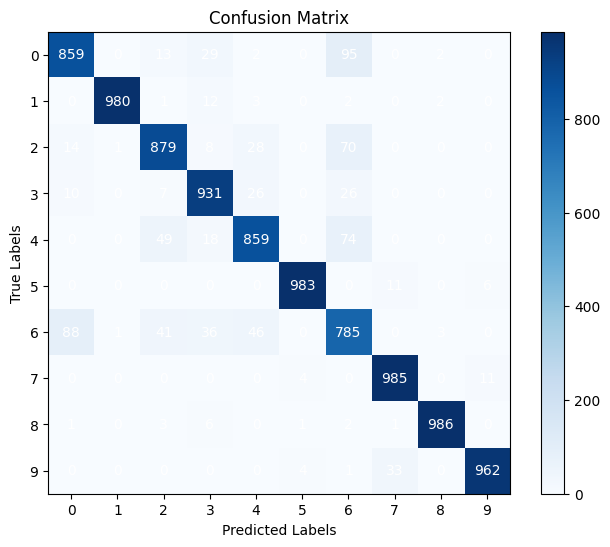

In [77]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='white')
plt.show()

# YÊU CẦU 4: MÔ HÌNH SVM

## Chuẩn bị dữ liệu

In [78]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [80]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Chuẩn hóa các giá trị pixel từ [0, 255] về [0, 1]

In [81]:
#Normalization
X_train = x_train.reshape((x_train.shape[0],-1))/255.0
X_test = x_test.reshape((x_test.shape[0],-1))/255.0

Chia dữ liệu với tỉ lệ 0.1

In [82]:
#Split data
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.10, random_state=101)

## Model

Xây dựng mô hình SVM

## Linear

Mô hình tuyến tính

In [83]:
#Linear model
svm_linear = svm.SVC(kernel='linear')

In [84]:
#Train model with train set
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [85]:
#Predict on test
y_linear = svm_linear.predict(x_test)

Đánh giá mô hình

In [86]:
accuracy_linear=accuracy_score(y_test, y_linear)
print('Accuracy: ',accuracy_linear)

Accuracy:  0.8248518518518518


In [87]:
conf_mat_linear = confusion_matrix(y_test, y_linear)

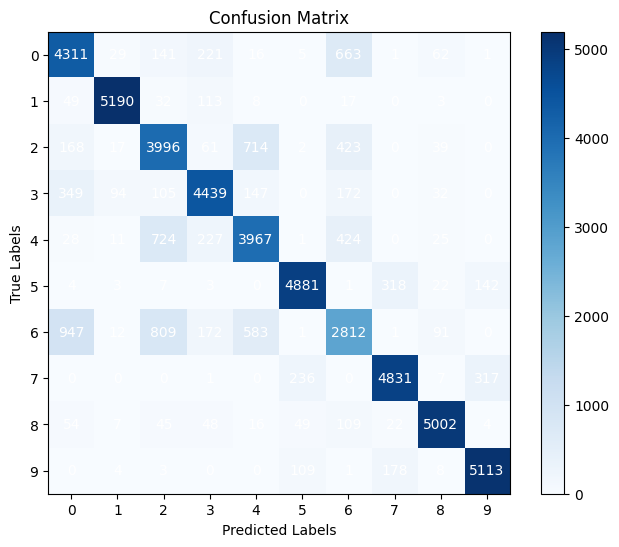

In [88]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_linear, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_mat_linear[i, j], ha='center', va='center', color='white')
plt.show()

In [89]:
report_linear = classification_report(y_test,y_linear)
print(report_linear)

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      5450
           1       0.97      0.96      0.96      5412
           2       0.68      0.74      0.71      5420
           3       0.84      0.83      0.84      5338
           4       0.73      0.73      0.73      5407
           5       0.92      0.91      0.92      5381
           6       0.61      0.52      0.56      5428
           7       0.90      0.90      0.90      5392
           8       0.95      0.93      0.94      5356
           9       0.92      0.94      0.93      5416

    accuracy                           0.82     54000
   macro avg       0.82      0.83      0.82     54000
weighted avg       0.82      0.82      0.82     54000



## RBF

Mô hình phi tuyến với RBF kernel

In [90]:
#RBF model
svm_rbf = svm.SVC(kernel='rbf')

In [91]:
#Train model
svm_rbf.fit(x_train,y_train)

SVC()

In [92]:
#Predict on test
y_rbf = svm_rbf.predict(x_test)

Đánh giá mô hình

In [93]:
accuracy_rbf=accuracy_score(y_test, y_rbf)
print('Accuracy: ', accuracy_rbf)

Accuracy:  0.8496666666666667


In [94]:
conf_mat_rbf = confusion_matrix(y_test, y_rbf)

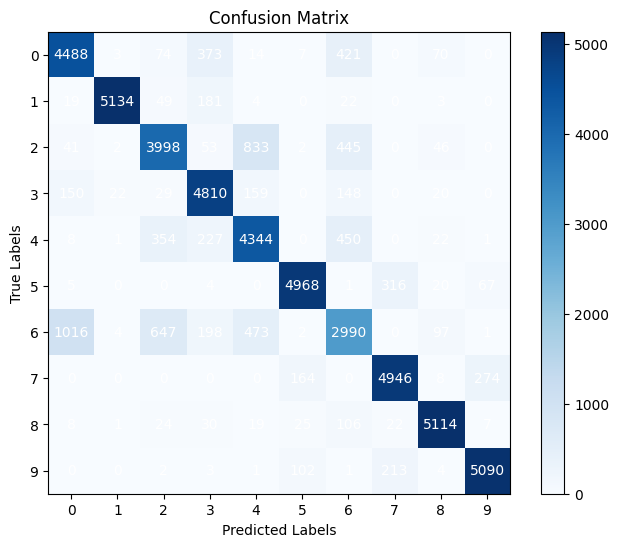

In [95]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat_rbf, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_mat_rbf[i, j], ha='center', va='center', color='white')
plt.show()

In [96]:
report_rbf = classification_report(y_test,y_rbf)
print(report_rbf)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5450
           1       0.99      0.95      0.97      5412
           2       0.77      0.74      0.75      5420
           3       0.82      0.90      0.86      5338
           4       0.74      0.80      0.77      5407
           5       0.94      0.92      0.93      5381
           6       0.65      0.55      0.60      5428
           7       0.90      0.92      0.91      5392
           8       0.95      0.95      0.95      5356
           9       0.94      0.94      0.94      5416

    accuracy                           0.85     54000
   macro avg       0.85      0.85      0.85     54000
weighted avg       0.85      0.85      0.85     54000



# YÊU CẦU 5: MÔ HÌNH NAIVE BAYES

## Hàm tự dựng cho gauss naive bayes

In [98]:
import numpy as np

class GaussianNaiveBayes:
    def fit(self, features: np.ndarray, labels: np.ndarray) -> None:
        self.labels = labels
        self.unique_labels = np.unique(labels)
        self.params = []
        # For the given label, calculate the mean and variance of all features
        for label in self.unique_labels:
            label_features = features[self.labels == label]
            self.params.append([(col.mean(), col.var() + 1e-15) for col in label_features.T])

    def likelihood(self, data: float, mean: float, var: float) -> float:
        eps = 1e-15
        coeff = 1 / np.sqrt(2 * np.pi * (var + eps))
        exponent = np.exp(-((data - mean) ** 2 / (2 * (var + eps))))
        return coeff * exponent

    def predict(self, features: np.ndarray) -> np.ndarray:
        num_samples, _ = features.shape
        predictions = np.empty(num_samples)
        eps = 1e-15  # Thêm epsilon nhỏ để tránh tính log của 0
        for idx, feature in enumerate(features):
            posteriors = []
            for label_idx, label in enumerate(self.unique_labels):
                prior = np.log((self.labels == label).mean())
                pairs = zip(feature, self.params[label_idx])
                likelihood = np.sum([np.log(self.likelihood(f, m, v) + eps) for f, (m, v) in pairs])
                posteriors.append(prior + likelihood)
            predictions[idx] = self.unique_labels[np.argmax(posteriors)]
        return predictions


if __name__ == "__main__":
    # from sklearn.datasets import load_iris
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    from sklearn.model_selection import train_test_split

    from tensorflow.keras.datasets import fashion_mnist
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
    train_images = train_images.reshape(60000, 784)
    test_images = test_images.reshape(10000, 784)

    gnb = GaussianNaiveBayes()
    gnb.fit(train_images, train_labels)
    predictions = gnb.predict(test_images)

    accuracy = accuracy_score(test_labels, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        test_labels, predictions, average="macro"
    )

    print(f"Accuracy:  {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F-score:   {fscore:.3f}")
    print()
    print(f"Mislabeled points: {(predictions != test_labels).sum()}/{test_images.shape[0]}")

Accuracy:  0.518
Precision: 0.604
Recall:    0.518
F-score:   0.481

Mislabeled points: 4816/10000


In [99]:
predictions

array([7., 4., 1., ..., 3., 1., 7.])

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
accuracy = accuracy_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='macro')
recall = recall_score(test_labels, predictions, average='macro')
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)

Accuracy:  0.5184
Recall:  0.5184
Precision:  0.6039913049505705


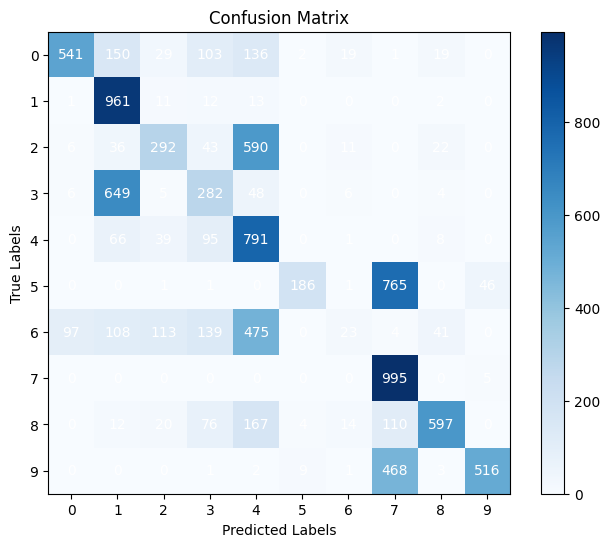

In [101]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

## Sử dụng thư viện

In [102]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [104]:
import gzip
import os
import numpy as np

# set names to the paths because they're too long
data_path = os.path.join(os.getcwd(), 'fashion-mnist')

# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')

# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path,
                   labels_path,
                   shuffle=False,
                   image_size=28):
    """
    This function reads all the data from the MNIST dataset.

    Parameters:
    - images_path: Đường dẫn tới tập tin chứa hình ảnh dữ liệu.
    - labels_path: Đường dẫn tới tập tin chứa nhãn tương ứng với các hình ảnh.
    - shuffle: True nếu bạn muốn xáo trộn dữ liệu, False nếu không.
    - image_size: Kích thước của mỗi hình ảnh, mặc định là 28x28.

    Returns:
    - images: Mảng chứa hình ảnh dưới dạng vector.
    - labels: Mảng chứa nhãn tương ứng với mỗi hình ảnh.
    """
    # Đọc dữ liệu hình ảnh
    with gzip.open(images_path, 'r') as f_images:
        f_images.read(16)  # Bỏ qua 16 byte header
        buf_images = f_images.read()
        images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
        images = images.reshape(-1, image_size * image_size)

    # Đọc dữ liệu nhãn
    with gzip.open(labels_path, 'r') as f_labels:
        f_labels.read(8)  # Bỏ qua 8 byte header
        buf_labels = f_labels.read()
        labels = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # Xáo trộn dữ liệu nếu được yêu cầu
    if shuffle:
        # Tạo thứ tự ngẫu nhiên
        rand_order = np.random.permutation(len(images))
        # Áp dụng thứ tự ngẫu nhiên đó vào dữ liệu hình ảnh và nhãn
        images = images[rand_order]
        labels = labels[rand_order]

    return images, labels
train_images, train_labels = get_mnist_data(train_images_path,
                                            train_labels_path,
                                            shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path,
                                          test_labels_path,
                                          shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

fit_nb = gnb.fit(train_images, train_labels)

predictions_nb = fit_nb.predict(test_images)


In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(test_labels, predictions_nb)
conf_matrix = confusion_matrix(test_labels, predictions_nb)
precision = precision_score(test_labels, predictions_nb, average='macro')
recall = recall_score(test_labels, predictions_nb, average='macro')
print("Accuracy mô hình dùng thư viện  (chưa xử lý tối ưu): ", accuracy)
print("Recall mô hình dùng thư viện (chưa xử lý tối ưu): ", recall)
print("Precision mô hình dùng thư viện (chưa xử lý tối ưu): ", precision)

Accuracy mô hình dùng thư viện  (chưa xử lý tối ưu):  0.5856
Recall mô hình dùng thư viện (chưa xử lý tối ưu):  0.5856
Precision mô hình dùng thư viện (chưa xử lý tối ưu):  0.6361313853747838


## xử lý tối ưu

In [107]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [108]:
mnb.fit(train_images,train_labels)
gnb.fit(train_images,train_labels)

GaussianNB()

In [109]:
mnb.score(train_images,train_labels)

0.6669666666666667

In [110]:
gnb.score(train_images,train_labels)

0.5877833333333333

Multinimial NB cho kết quả tốt hơn

In [111]:
from sklearn.model_selection import cross_val_score


print(cross_val_score(gnb,train_images,train_labels,scoring="accuracy",cv=10))
print(cross_val_score(gnb,train_images,train_labels,scoring="accuracy",cv=10).mean())

[0.55983333 0.58916667 0.59316667 0.606      0.59116667 0.59616667
 0.58433333 0.57633333 0.592      0.591     ]
0.5879166666666666


Độ chính xác trung bình cho GNB là khoảng 56.2%

In [112]:
print(cross_val_score(mnb,train_images,train_labels,scoring="accuracy",cv=10).mean())

0.6666833333333333


## Đánh giá mô hình

### Multinomial NB

In [113]:
Y_mnb = mnb.predict(test_images)
cnf_matrix = confusion_matrix(test_labels,Y_mnb)
print(cnf_matrix)

[[776   1   5 112   6   0  80   0  20   0]
 [ 17 872  12  84   8   0   5   0   2   0]
 [  8   0 569  13 299   0  86   0  25   0]
 [ 27   9   1 874  25   0  61   0   3   0]
 [  0   1 227 112 602   0  49   0   9   0]
 [  1   0   0   0   0 138   8 503   7 343]
 [230   1 139  85 332   0 163   0  50   0]
 [  0   0   0   0   0  25   0 920   0  55]
 [  7   0   3  49  83   2  43  10 803   0]
 [  0   0   1   1   0  44  12 103   2 837]]


In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(test_labels, Y_mnb)
conf_matrix = confusion_matrix(test_labels, Y_mnb)
precision = precision_score(test_labels, Y_mnb, average='macro')
recall = recall_score(test_labels, Y_mnb, average='macro')
print("Accuracy mô hình dùng thư viện multinomial NB: ", accuracy)
print("Recall mô hình dùng thư viện multinomial NB: ", recall)
print("Precision mô hình dùng thư viện multinomial NB: ", precision)

Accuracy mô hình dùng thư viện multinomial NB:  0.6554
Recall mô hình dùng thư viện multinomial NB:  0.6554
Precision mô hình dùng thư viện multinomial NB:  0.6540725579411306


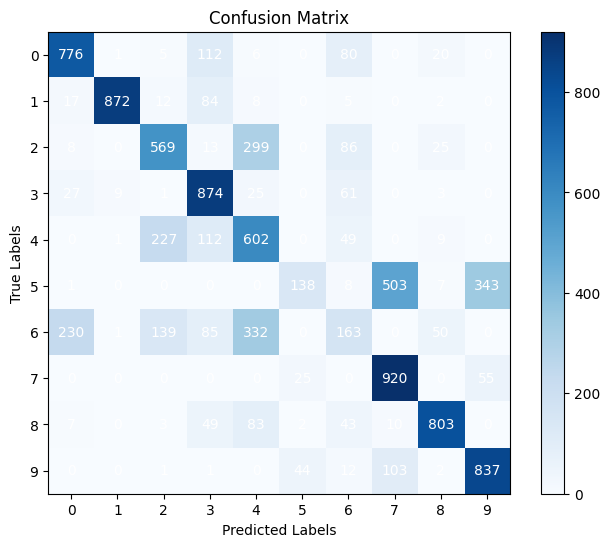

In [115]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cnf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, cnf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

### Gausian NB

In [116]:
Y_gnb = gnb.predict(test_images)
cnf_matrix = confusion_matrix(test_labels,Y_gnb)
print(cnf_matrix)

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


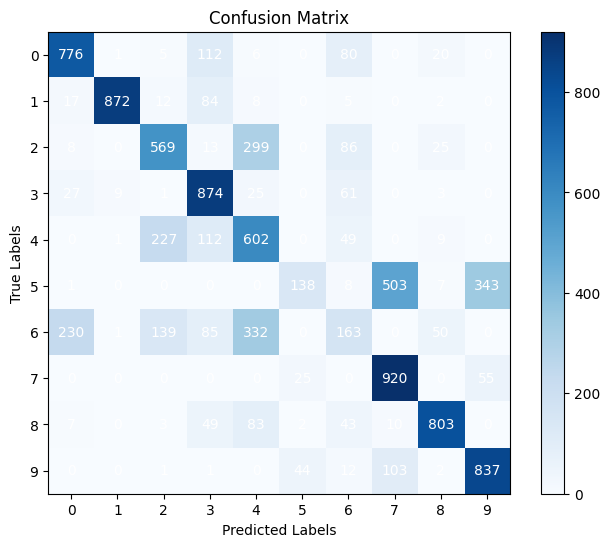

In [117]:
# Vẽ confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

accuracy = accuracy_score(test_labels, Y_gnb)
conf_matrix = confusion_matrix(test_labels, Y_gnb)
precision = precision_score(test_labels, Y_gnb, average='macro')
recall = recall_score(test_labels, Y_gnb, average='macro')
print("Accuracy mô hình dùng thư viện Gaussian NB: ", accuracy)
print("Recall mô hình dùng thư viện Gaussian NB: ", recall)
print("Precision mô hình dùng thư viện Gaussian NB: ", precision)

Accuracy mô hình dùng thư viện Gaussian NB:  0.5856
Recall mô hình dùng thư viện Gaussian NB:  0.5856
Precision mô hình dùng thư viện Gaussian NB:  0.6361313853747838
